In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import glob
import os

In [3]:
O0 = 'C - O0'
O3 = 'C - O3'
ASM = 'ASM - SSE'
algo = 'Algoritmo'
tam = 'Tamaño'
ticks = 'Ticks'
minTam = 4096
maxTam = 262144

In [4]:
dfO0 = pd.read_csv('rgb2yuv-control.csv')
dfO3 = pd.read_csv('rgb2yuv-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2, 1: 1})
dfRGB = pd.concat([dfO0, dfO3], ignore_index=True)
dfRGB[algo] = dfRGB[algo].map({1: ASM, 0: O0, 2: O3})
dfRGB = dfRGB.groupby([algo, tam]).min().reset_index()
dfRGB.insert(0,"Conversor","RGB2YUV")

dfO0 = pd.read_csv('yuv2rgb-control.csv')
dfO3 = pd.read_csv('yuv2rgb-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2, 1: 1})
dfYUV = pd.concat([dfO0, dfO3], ignore_index=True)
dfYUV[algo] = dfYUV[algo].map({1: ASM, 0: O0, 2: O3})
dfYUV = dfYUV.groupby([algo, tam]).min().reset_index()
dfYUV.insert(0,"Conversor","YUV2RGB")

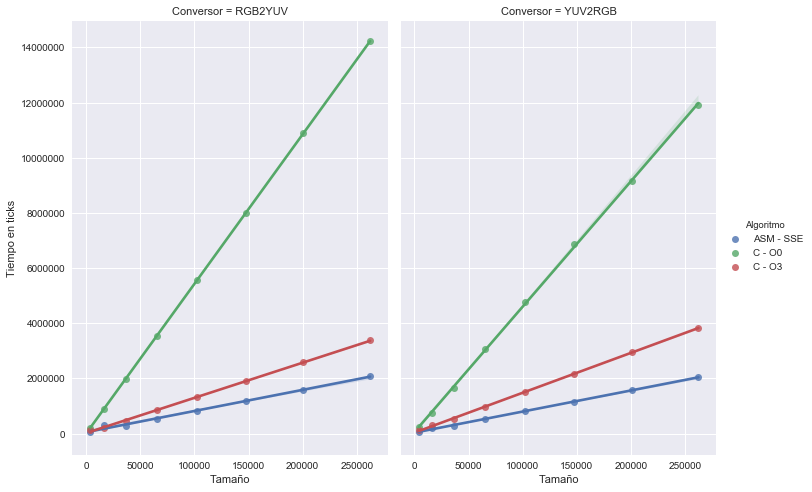

In [20]:
df = pd.concat([dfRGB, dfYUV], ignore_index=True)

g = sns.lmplot(x=tam, y=ticks, data=df, hue=algo, col='Conversor', truncate=True, size=7, aspect=0.7)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

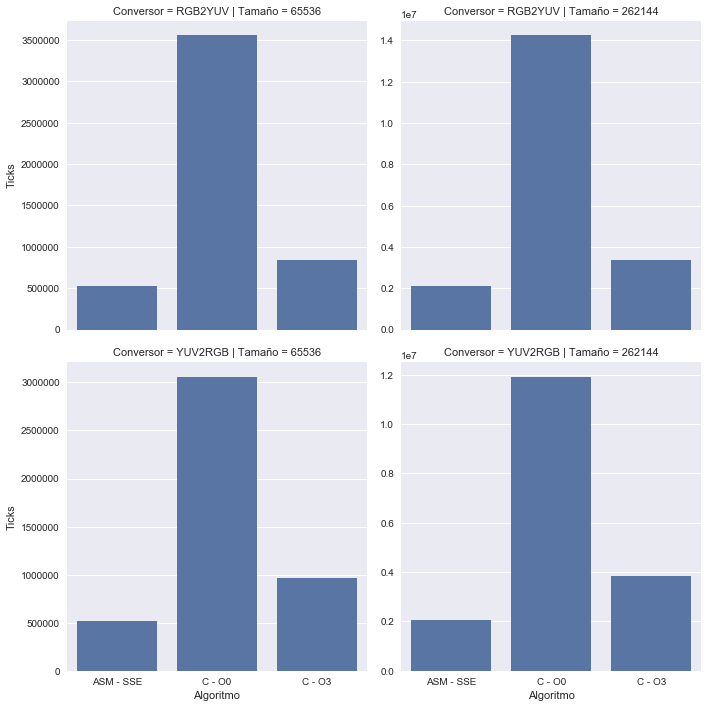

In [22]:
df = pd.concat([dfRGB, dfYUV], ignore_index=True)
df = df[((df.Tamaño == maxTam) | (df.Tamaño == minTam*16))]

g = sns.FacetGrid(data=df, col=tam, row='Conversor', sharey=False, size=5)
g.set(ylabel='Tiempo en ticks')
g = g.map(sns.barplot, algo, ticks, data=df)
plt.show()

In [47]:
dfO0 = pd.read_csv('fourCombine-control.csv')
dfO3 = pd.read_csv('fourCombine-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2, 1: 1})

dfFourCombine = pd.concat([dfO0, dfO3], ignore_index=True)
dfFourCombine[algo] = dfFourCombine[algo].map({1: ASM, 0: O0, 2: O3})
dfFourCombine = dfFourCombine.groupby([algo, tam]).min().reset_index()

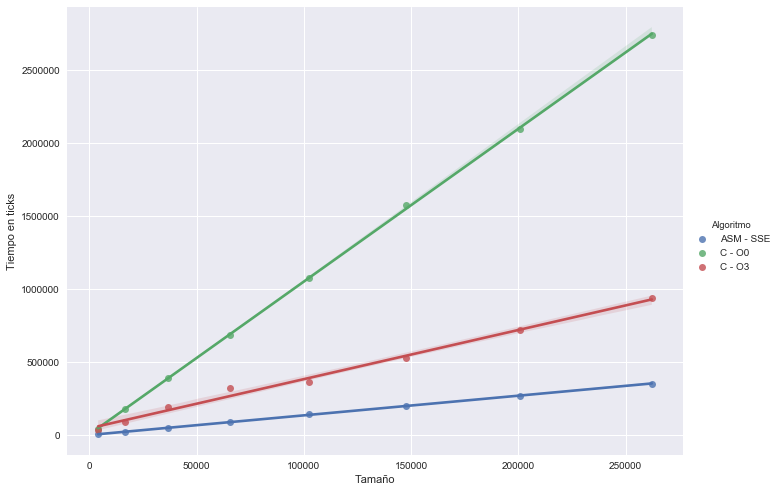

In [48]:
g = sns.lmplot(x=tam, y=ticks, data=dfFourCombine, hue=algo, truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

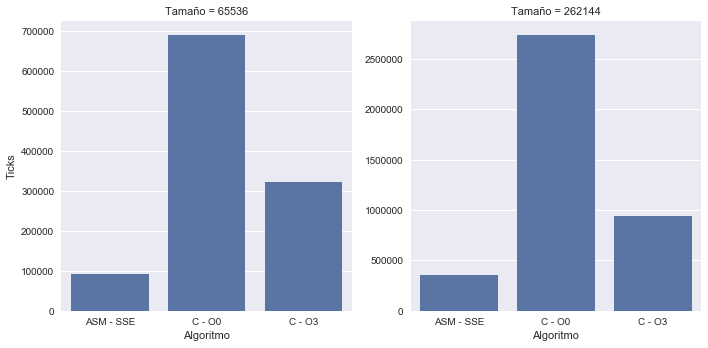

In [49]:
df = dfFourCombine[(dfFourCombine.Tamaño == maxTam) | (dfFourCombine.Tamaño == minTam * 16)]
g = sns.FacetGrid(data=df, col=tam, sharey=False, size=5)
g.set(ylabel='Tiempo en ticks')
sns.plt.ticklabel_format(style='plain', axis='y')
g = g.map(sns.barplot, algo, ticks, data=df)
plt.show()

In [4]:
dfO0 = pd.read_csv('linearZoom-control.csv')
dfO3 = pd.read_csv('linearZoom-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2, 1: 1})
dfZoom = pd.concat([dfO0, dfO3], ignore_index=True)
dfZoom[algo] = dfZoom[algo].map({1: ASM, 0: O0, 2: O3})

dfZoom = dfZoom.groupby([algo, tam]).min().reset_index()

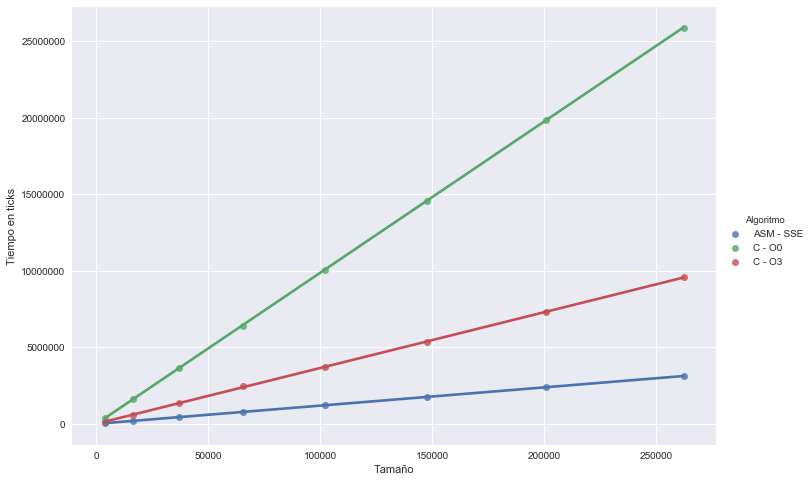

In [81]:
g = sns.lmplot(x=tam, y=ticks, data=dfZoom, hue=algo, truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

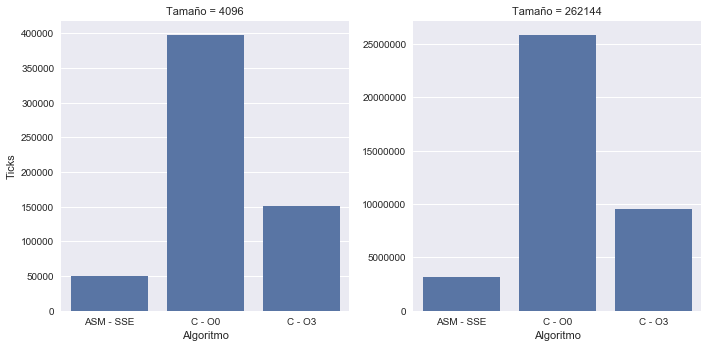

In [32]:
df = dfZoom[(dfZoom.Tamaño == maxTam) | (dfZoom.Tamaño == minTam)]
g = sns.FacetGrid(data=df, col=tam, sharey=False, size=5)
g.set(ylabel='Tiempo en ticks')
sns.plt.ticklabel_format(style='plain', axis='y')
g = g.map(sns.barplot, algo, ticks, data=df)
plt.show()

In [24]:
dfO0 = pd.read_csv('maxCloser-control.csv')
dfO3 = pd.read_csv('maxCloser-O3.csv')
dfO3[algo] = dfO3[algo].map({0: 2, 1: 1})
dfMaxCloser = pd.concat([dfO0, dfO3], ignore_index=True)
dfMaxCloser[algo] = dfMaxCloser[algo].map({1: ASM, 0: O0, 2: O3})
dfMaxCloser = dfMaxCloser.groupby([algo, tam]).min().reset_index()

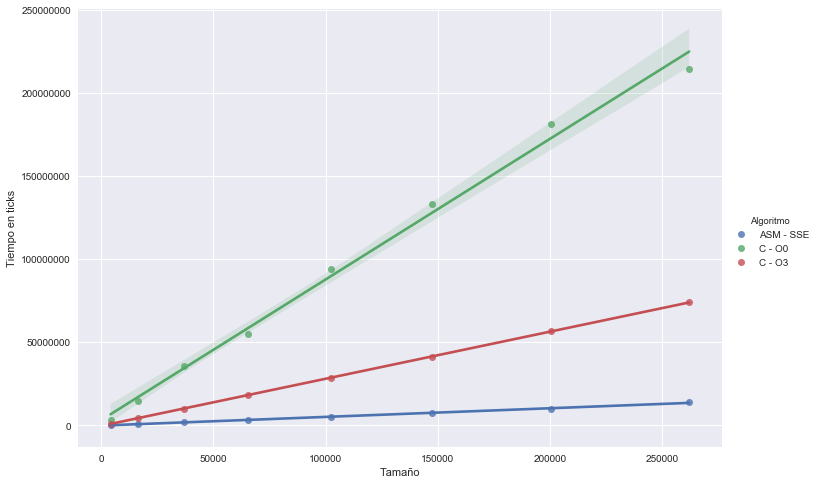

In [98]:
g = sns.lmplot(x=tam, y=ticks, data=dfMaxCloser, hue=algo, truncate=True, size=7, aspect=1.4)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

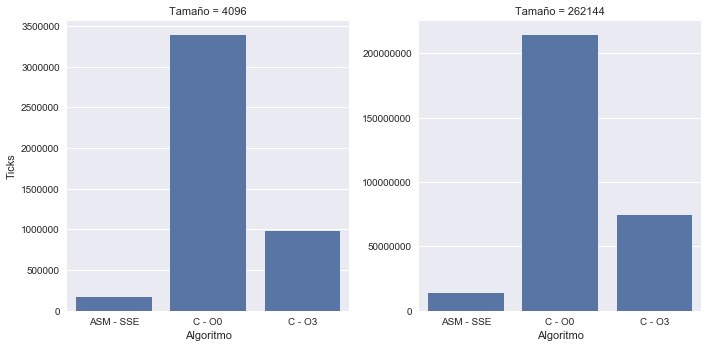

In [25]:
df = dfMaxCloser[(dfMaxCloser.Tamaño == maxTam) | (dfMaxCloser.Tamaño == minTam)]
g = sns.FacetGrid(data=df, col=tam, sharey=False, size=5)
g.set(ylabel='Tiempo en ticks')
sns.plt.ticklabel_format(style='plain', axis='y')
g = g.map(sns.barplot, algo, ticks, data=df)
plt.show()

# Experimentos

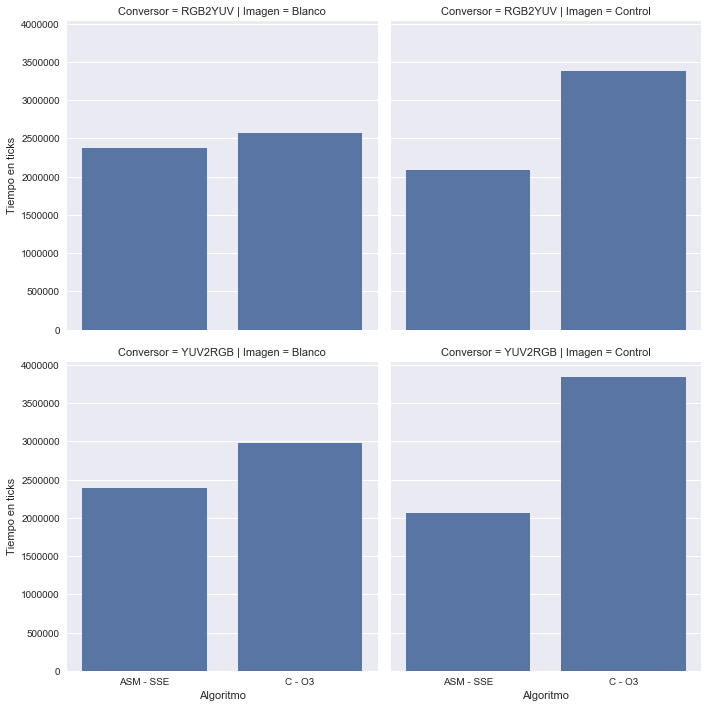

In [30]:
dfRGBBlanco = pd.read_csv('rgb2yuv-blanco.csv')
dfRGBBlanco[algo] = dfRGBBlanco[algo].map({1: ASM, 0: O3})
dfRGBBlanco = dfRGBBlanco.groupby([algo, tam]).min().reset_index()
dfRGBBlanco.insert(0,"Conversor","RGB2YUV")
dfRGBBlanco.insert(0,"Imagen","Blanco")

dfRGBCopy = dfRGB[dfRGB.Algoritmo != O0]
dfRGBCopy.insert(0,"Imagen","Control")

dfYUVBlanco = pd.read_csv('yuv2rgb-blanco.csv')
dfYUVBlanco[algo] = dfYUVBlanco[algo].map({1: ASM, 0: O3})
dfYUVBlanco = dfYUVBlanco.groupby([algo, tam]).min().reset_index()
dfYUVBlanco.insert(0,"Conversor","YUV2RGB")
dfYUVBlanco.insert(0,"Imagen","Blanco")

dfYUVCopy = dfYUV[dfYUV.Algoritmo != O0]
dfYUVCopy.insert(0,"Imagen","Control")

df = pd.concat([dfRGBBlanco,dfRGBCopy,dfYUVBlanco,dfYUVCopy], ignore_index=True)
df = df[df.Tamaño == 262144]

g = sns.FacetGrid(df, row='Conversor', col='Imagen', size=5, aspect=1)
g.map(sns.barplot, algo, ticks)
g.set_ylabels('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

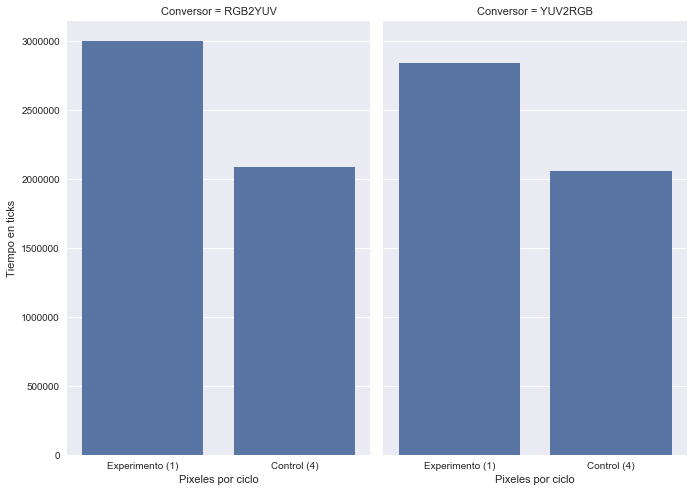

In [18]:
dfRGB1Pixel = pd.read_csv('rgb2yuv-1pixel.csv')
dfRGB1Pixel[algo] = dfRGB1Pixel[algo].map({1: ASM})
dfRGB1Pixel = dfRGB1Pixel.groupby([algo, tam]).min().reset_index()
dfRGB1Pixel.insert(0,"Conversor","RGB2YUV")
dfRGB1Pixel.insert(0,"Pixeles por ciclo","Experimento (1)")

dfRGBCopy = dfRGB[dfRGB.Algoritmo == ASM]
dfRGBCopy.insert(0,"Pixeles por ciclo","Control (4)")

dfYUV1Pixel = pd.read_csv('yuv2rgb-1pixel.csv')
dfYUV1Pixel[algo] = dfYUV1Pixel[algo].map({1: ASM})
dfYUV1Pixel = dfYUV1Pixel.groupby([algo, tam]).min().reset_index()
dfYUV1Pixel.insert(0,"Conversor","YUV2RGB")
dfYUV1Pixel.insert(0,"Pixeles por ciclo","Experimento (1)")

dfYUVCopy = dfYUV[dfYUV.Algoritmo == ASM]
dfYUVCopy.insert(0,"Pixeles por ciclo","Control (4)")

df = pd.concat([dfRGB1Pixel,dfRGBCopy,dfYUV1Pixel,dfYUVCopy], ignore_index=True)
df = df[df.Tamaño == 262144]

g = sns.FacetGrid(df, col='Conversor', size=7, aspect=0.7)
g.map(sns.barplot, 'Pixeles por ciclo', ticks);
g.set_ylabels('Tiempo en ticks')
plt.show()

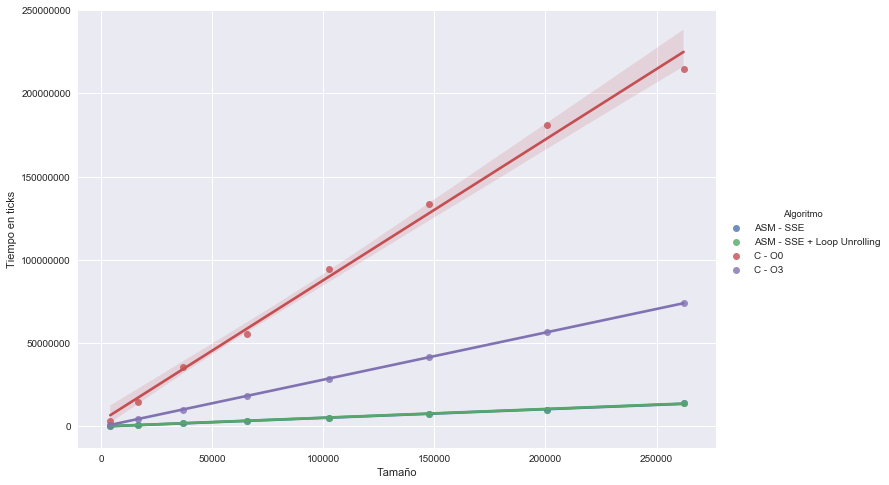

In [102]:
dfUnroll = pd.read_csv('maxCloser-unroll.csv')
dfUnroll[algo] = dfUnroll[algo].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfMaxCloser, dfUnroll], ignore_index=True)
df = df.groupby([algo, tam]).min().reset_index()

sns.lmplot(x=tam, y=ticks, data=df, hue=algo, truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

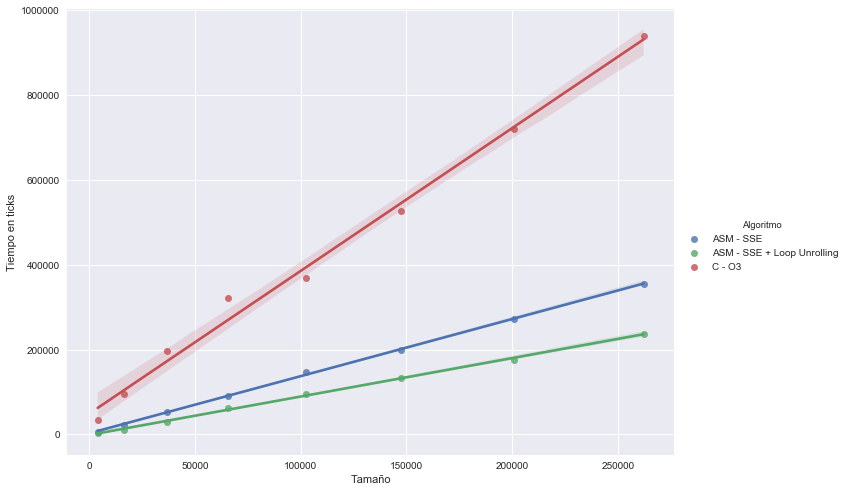

In [108]:
dfUnroll = pd.read_csv('fourCombine-unroll.csv')
dfUnroll[algo] = dfUnroll[algo].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfFourCombine, dfUnroll], ignore_index=True)
df = df.groupby([algo, tam]).min().reset_index()
df = df[df.Algoritmo != O0]

sns.lmplot(x=tam, y=ticks, data=df, hue=algo, truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

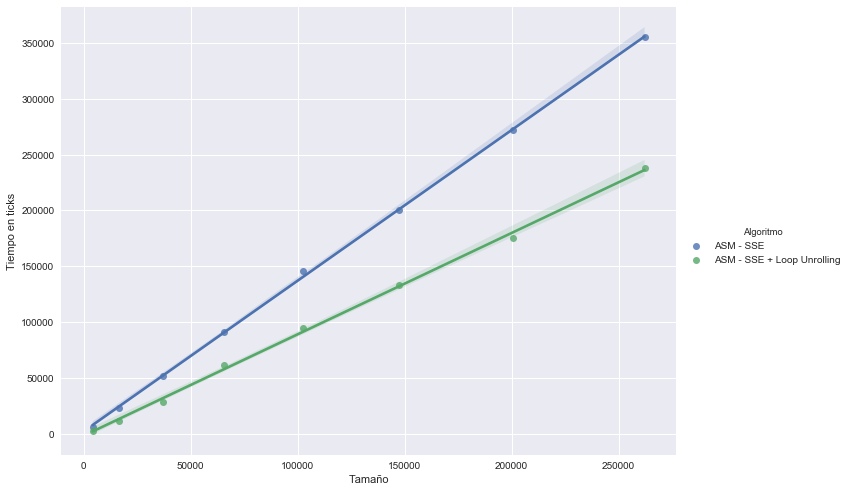

In [106]:
dfUnroll = pd.read_csv('fourCombine-unroll.csv')
dfUnroll[algo] = dfUnroll[algo].map({1: 'ASM - SSE + Loop Unrolling'})

df = pd.concat([dfFourCombine, dfUnroll], ignore_index=True)
df = df.groupby([algo, tam]).min().reset_index()
df = df[(df.Algoritmo != O0) & (df.Algoritmo != O3)]

sns.lmplot(x=tam, y=ticks, data=df, hue=algo, truncate=True, size=7, aspect=1.4)
plt.ylabel('Tiempo en ticks')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

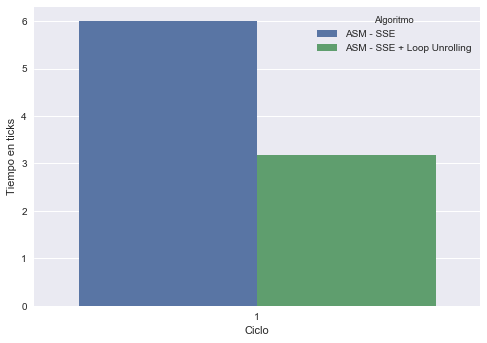

In [8]:
df1C = pd.read_csv('fourCombine-1ciclo.csv')

df1CU = pd.read_csv('fourCombine-1ciclo-unroll.csv')
df1CU[algo] = df1CU[algo].map({0: 0, 1: 2})
df = pd.concat([df1C, df1CU], ignore_index=True)
df[algo] = df[algo].map({1: ASM, 2: 'ASM - SSE + Loop Unrolling'})
df = df.groupby([algo, 'Ciclo']).min().reset_index()
sns.barplot(x='Ciclo', y=ticks, data=df, hue=algo)
plt.ylabel('Tiempo en ticks')
plt.show()